In [19]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

def draw_hiv_flow_diagram(save_path="hiv_flow_diagram.png"):
    """
    Draws a flow diagram for the HIV two-subtype model, showing:
      - Susceptibles (X)
      - Infected Subtype 1 (Y1)
      - Infected Subtype 2 (Y2)
    with transitions to infection and to "out of system" (via death, therapy, or leaving).
    """
    # Create figure and axis
    fig, ax = plt.subplots(figsize=(7, 5))
    ax.set_xlim(0, 12)
    ax.set_ylim(0, 6)
    ax.set_aspect('equal')
    ax.axis('off')  # Hide the axes

    # --- 1) Draw the boxes for compartments ---
    # Rectangle(xy=(x, y), width, height)
    box_X  = mpatches.Rectangle((1, 2.5), 2, 1, edgecolor='black', facecolor='white')
    box_Y1 = mpatches.Rectangle((6, 4), 2, 1, edgecolor='black', facecolor='white')
    box_Y2 = mpatches.Rectangle((6, 1), 2, 1, edgecolor='black', facecolor='white')

    ax.add_patch(box_X)
    ax.add_patch(box_Y1)
    ax.add_patch(box_Y2)

    # Label the boxes
    ax.text(2, 3.0, "Susceptible\nX(t)", ha='center', va='center')
    ax.text(7, 4.5, "Subtype 1\nY1(t)", ha='center', va='center')
    ax.text(7, 1.5, "Subtype 2\nY2(t)", ha='center', va='center')

    # Arrow style
    arrow_style = mpatches.ArrowStyle("Simple", head_width=6, head_length=6)

    # --- 2) Arrows from X to Y1 and Y2 (infection) ---
    # X -> Y1
    arrow_XY1 = mpatches.FancyArrowPatch(
        (3, 3),  # start (right edge of X box)
        (6, 4.5),  # upper edge of Y1 box
        arrowstyle=arrow_style,
        connectionstyle="arc3,rad=0.2",
        color="black"
    )
    ax.add_patch(arrow_XY1)
    ax.text(4.5, 4.7, r"$\frac{b_1 c X Y_1}{N}$", fontsize=9)

    # X -> Y2
    arrow_XY2 = mpatches.FancyArrowPatch(
        (3, 3),  # start (right edge of X box)
        (6, 1.5),  # center of Y2 box
        arrowstyle=arrow_style,
        connectionstyle="arc3,rad=-0.2",
        color="black"
    )
    ax.add_patch(arrow_XY2)
    ax.text(4.5, 2.3, r"$\frac{b_2 c X Y_2}{N}$", fontsize=9)

    # --- 4) Arrows for leaving from Y1 (death + therapy + leaving) ---
    # We'll do a single arrow from Y1 to "out" labeled (l + c1 + s).
    arrow_Y1_out = mpatches.FancyArrowPatch(
        (8, 4.5),  # right edge of Y1 box
        (10, 4.5), # going out of figure
        arrowstyle=arrow_style,
        connectionstyle="arc3,rad=0.0",
        color="red"
    )
    ax.add_patch(arrow_Y1_out)
    ax.text(9, 4.7, r"$l + c_1 + s$", fontsize=9, color="red")

    # --- 5) Arrows for leaving from Y2 ---
    arrow_Y2_out = mpatches.FancyArrowPatch(
        (8, 1.5),  # right edge of Y2 box
        (10, 1.5), # going out of figure
        arrowstyle=arrow_style,
        connectionstyle="arc3,rad=0.0",
        color="red"
    )
    ax.add_patch(arrow_Y2_out)
    ax.text(9, 1.7, r"$l + c_2 + s$", fontsize=9, color="red")

    # Tidy up layout, save, and close
    plt.tight_layout()
    plt.savefig(save_path, dpi=300)
    plt.close()

if __name__ == "__main__":
    draw_hiv_flow_diagram("hiv_flow_diagram.png")

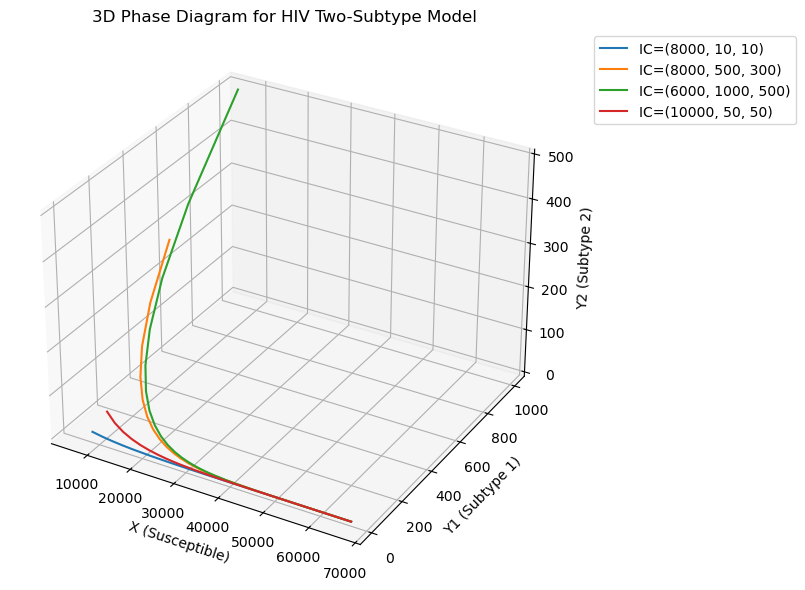

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import solve_ivp

def hiv_two_subtype_ode(t, y, params):
    """
    ODE system for the two-subtype HIV model.

    y = [X, Y1, Y2]
    params = (P, l, b1, b2, c, c1, c2, s)
    """
    X, Y1, Y2 = y
    P, l, b1, b2, c, c1, c2, s = params

    N = X + Y1 + Y2  # total
    # Right-hand sides
    dXdt = P - l*X - (b1*c*X*Y1)/N - (b2*c*X*Y2)/N
    dY1dt = (b1*c*X*Y1)/N - (l + c1 + s)*Y1
    dY2dt = (b2*c*X*Y2)/N - (l + c2 + s)*Y2

    return [dXdt, dY1dt, dY2dt]

def plot_3d_phase_diagram(params, initial_conditions, t_span=(0, 200), t_eval=None):
    """
    Solves the HIV two-subtype ODE system for a set of initial conditions
    and plots the trajectories in a 3D phase diagram (X, Y1, Y2).
    """
    if t_eval is None:
        # create a time grid for evaluation
        t_eval = np.linspace(t_span[0], t_span[1], 200)

    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(111, projection='3d')

    # Solve for each set of initial conditions
    for ic in initial_conditions:
        sol = solve_ivp(
            fun=lambda t, y: hiv_two_subtype_ode(t, y, params),
            t_span=t_span, y0=ic, t_eval=t_eval
        )
        X_sol = sol.y[0, :]
        Y1_sol = sol.y[1, :]
        Y2_sol = sol.y[2, :]

        ax.plot(X_sol, Y1_sol, Y2_sol, label=f'IC={ic}')

    # Label axes
    ax.set_xlabel('X (Susceptible)')
    ax.set_ylabel('Y1 (Subtype 1)')
    ax.set_zlabel('Y2 (Subtype 2)')
    ax.set_title('3D Phase Diagram for HIV Two-Subtype Model')
    # optionally, show legend outside plot
    ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1))

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    # Example parameters: (P, l, b1, b2, c, c1, c2, s)
    # Adjust to match your assignment.
    params = (2000, 0.03, 0.06, 0.08, 4, 0.1, 0.08, 0.4)

    # Example initial conditions
    # (X0, Y10, Y20)
    ics = [
        (8000, 10, 10),
        (8000, 500, 300),
        (6000, 1000, 500),
        (10000, 50, 50),
    ]

    plot_3d_phase_diagram(params, ics, t_span=(0,300))

In [2]:
# numerics.py
"""
This script implements two solvers for the HIV two-subtype model:
1) A 4th-Order Runge-Kutta (RK4) solver
2) A Gauss-Seidel-type implicit solver

It compares solutions for various step sizes and parameters,
then produces time-series plots and a parameter-sweep plot 
demonstrating the impact of therapy coverage.
"""

import numpy as np
import matplotlib.pyplot as plt

# ---------------------------
# Model definition
# ---------------------------
def hiv_deriv(t, Y, params):
    """
    Defines the ODEs for the HIV model with two subtypes.
    Y = [X, Y1, Y2]
    
    params is a tuple containing:
        (P, l, b1, b2, c_, c1, c2, s_)

    Returns the vector [dX/dt, dY1/dt, dY2/dt].
    """
    X, Y1, Y2 = Y
    P, l, b1, b2, c_, c1, c2, s_ = params
    
    N = X + Y1 + Y2  # total
    dXdt = (
        P 
        - l*X 
        - (b1 * c_ * X * Y1) / N 
        - (b2 * c_ * X * Y2) / N
    )
    dY1dt = (
        (b1 * c_ * X * Y1) / N
        - (l + c1 + s_) * Y1
    )
    dY2dt = (
        (b2 * c_ * X * Y2) / N
        - (l + c2 + s_) * Y2
    )
    return np.array([dXdt, dY1dt, dY2dt])

# ---------------------------
# 1) Fourth-Order Runge-Kutta (RK4)
# ---------------------------
def rk4_step(func, t, Y, dt, params):
    """
    Performs a single RK4 step for the system Y'(t) = func(t, Y, params).
    """
    k1 = func(t, Y, params)
    k2 = func(t + dt/2, Y + (dt/2)*k1, params)
    k3 = func(t + dt/2, Y + (dt/2)*k2, params)
    k4 = func(t + dt,   Y + dt*k3,   params)
    return Y + (dt/6.0)*(k1 + 2*k2 + 2*k3 + k4)

def rk4_solve(Y0, t_span, dt, params):
    """
    Integrates the HIV model from t_span[0] to t_span[1] with step dt
    using the RK4 method.
    """
    times = np.arange(t_span[0], t_span[1] + dt, dt)
    sol = np.zeros((len(times), len(Y0)))
    sol[0] = Y0
    for i in range(len(times) - 1):
        sol[i+1] = rk4_step(hiv_deriv, times[i], sol[i], dt, params)
    return times, sol

# ---------------------------
# 2) Gauss-Seidel-type Implicit Solver
# ---------------------------
def gauss_seidel_step(Xn, Y1n, Y2n, dt, params):
    """
    Performs one Gauss-Seidel update step:

      X^(n+1), Y1^(n+1), Y2^(n+1)

    using a partially implicit approach. 
    This is a simplified demonstration and may be 
    refined for full consistency in certain terms.
    """
    P, l, b1, b2, c_, c1, c2, s_ = params
    Nn = Xn + Y1n + Y2n
    
    # Update X^(n+1):
    # (X^(n+1) - X^n)/dt = P - l * X^(n+1) - (b1 c X^(n+1) Y1^n)/Nn - ...
    # Rearrange to isolate X^(n+1).
    denomX = 1 + l*dt + dt*c_*(b1*Y1n + b2*Y2n)/Nn
    X_next = (Xn + P*dt) / denomX
    
    # Update Y1^(n+1):
    # (Y1^(n+1) - Y1^n)/dt = (b1 c X^(n+1) Y1^(n+1))/(X^(n+1)+Y1^(n+1)+Y2^n) - (l+c1+s) Y1^(n+1)
    # This is a simplified approach, often done in an iterative or final form. 
    # We'll approximate with Y2^n in the denominator.
    denomY1 = 1 + (l + c1 + s_)*dt
    infection_term_y1 = (b1 * c_ * X_next * Y1n / (X_next + Y1n + Y2n))
    Y1_next = (Y1n + infection_term_y1*dt) / denomY1
    
    # Update Y2^(n+1):
    # Similarly approximate
    denomY2 = 1 + (l + c2 + s_)*dt
    infection_term_y2 = (b2 * c_ * X_next * Y2n / (X_next + Y1_next + Y2n))
    Y2_next = (Y2n + infection_term_y2*dt) / denomY2
    
    return X_next, Y1_next, Y2_next

def gauss_seidel_solve(Y0, t_span, dt, params):
    """
    Integrates the HIV model from t_span[0] to t_span[1] with step dt
    using the Gauss-Seidel-type implicit method.
    """
    times = np.arange(t_span[0], t_span[1] + dt, dt)
    sol = np.zeros((len(times), len(Y0)))
    sol[0] = Y0
    for i in range(len(times) - 1):
        Xn, Y1n, Y2n = sol[i]
        X_next, Y1_next, Y2_next = gauss_seidel_step(Xn, Y1n, Y2n, dt, params)
        sol[i+1] = [X_next, Y1_next, Y2_next]
    return times, sol

# ---------------------------
# 3) Demonstration/Comparison
# ---------------------------
def compare_solutions():
    """
    Compare RK4 vs. Gauss-Seidel for different dt,
    and plot the total infected Y1+Y2 over time.
    """
    # Model parameters
    P, l = 2000, 1/32
    b1, b2 = 0.06, 0.10
    c_, c1, c2 = 4.0, 0.1, 0.1
    s_ = 0.4
    params = (P, l, b1, b2, c_, c1, c2, s_)
    
    # Initial conditions & time domain
    Y0 = [8000, 200, 300]
    t_span = (0, 300)
    
    dt_values = [0.01, 1.0, 3.0]  # step sizes to test
    
    plt.figure(figsize=(8,6))
    
    for dt in dt_values:
        # Solve with RK4
        t_rk4, sol_rk4 = rk4_solve(Y0, t_span, dt, params)
        X_rk4, Y1_rk4, Y2_rk4 = sol_rk4.T
        
        # Solve with Gauss-Seidel
        t_gs, sol_gs = gauss_seidel_solve(Y0, t_span, dt, params)
        X_gs, Y1_gs, Y2_gs = sol_gs.T
        
        # Plot total infected: Y1 + Y2
        plt.plot(t_rk4, Y1_rk4 + Y2_rk4, '--', label=f'RK4 (dt={dt})')
        plt.plot(t_gs,   Y1_gs + Y2_gs,  '-',  label=f'GS (dt={dt})')
    
    plt.title("Comparison: RK4 vs. Gauss-Seidel\nTotal Infected (Y1+Y2) Over Time")
    plt.xlabel("Time")
    plt.ylabel("Y1 + Y2")
    plt.legend()
    plt.tight_layout()
    plt.savefig("time_series_compare.png", dpi=300)
    plt.close()

def therapy_variation():
    """
    Sweep over s in [0,1] and plot final Y1, Y2 after 300 time units.
    Uses the Gauss-Seidel solver.
    """
    # Fixed parameters
    P, l = 2000, 1/32
    b1, b2 = 0.06, 0.10
    c_, c1, c2 = 4.0, 0.1, 0.1
    
    Y0 = [8000, 200, 300]
    t_span = (0, 300)
    dt = 0.1
    
    s_values = np.linspace(0, 1, 20)  # therapy coverage from 0% to 100%
    finalY1 = []
    finalY2 = []
    
    for s_ in s_values:
        params = (P, l, b1, b2, c_, c1, c2, s_)
        # Use Gauss-Seidel for stability
        t_sol, sol = gauss_seidel_solve(Y0, t_span, dt, params)
        X_sol, Y1_sol, Y2_sol = sol.T
        
        # Store the final values
        finalY1.append(Y1_sol[-1])
        finalY2.append(Y2_sol[-1])
    
    plt.figure(figsize=(7,5))
    plt.plot(s_values, finalY1, 'o-', label="Y1 (final)")
    plt.plot(s_values, finalY2, 'o-', label="Y2 (final)")
    plt.xlabel("Therapy rate (s)")
    plt.ylabel("Final Infected Population")
    plt.title("Final Y1, Y2 vs. Therapy Coverage (s)")
    plt.legend()
    plt.tight_layout()
    plt.savefig("therapy_variation.png", dpi=300)
    plt.close()

if __name__ == "__main__":
    compare_solutions()
    therapy_variation()
    print("Plots saved: 'time_series_compare.png' and 'therapy_variation.png'.")

Plots saved: 'time_series_compare.png' and 'therapy_variation.png'.


In [8]:
# b1b2_slices.py
"""
Demonstration of sweeping b1 while keeping certain b2 values fixed,
and plotting final infected population (Y1+Y2) after t=300.
"""

import numpy as np
import matplotlib.pyplot as plt

# --- Example: We'll reuse a Gauss-Seidel solver from your code base ---
# Suppose you have something like:
# from numerics import gauss_seidel_solve

# For demonstration, let's define a minimal version here:
def hiv_deriv(t, Y, params):
    X, Y1, Y2 = Y
    P, l, b1, b2, c_, c1, c2, s_ = params
    N = X + Y1 + Y2
    dXdt  = P - l*X - (b1*c_*X*Y1)/N - (b2*c_*X*Y2)/N
    dY1dt = (b1*c_*X*Y1)/N - (l + c1 + s_)*Y1
    dY2dt = (b2*c_*X*Y2)/N - (l + c2 + s_)*Y2
    return np.array([dXdt, dY1dt, dY2dt])

def gauss_seidel_step(Xn, Y1n, Y2n, dt, params):
    P, l, b1, b2, c_, c1, c2, s_ = params
    Nn = Xn + Y1n + Y2n
    
    # Update X:
    denomX = 1 + l*dt + (dt*c_*(b1*Y1n + b2*Y2n))/Nn
    X_next = (Xn + P*dt) / denomX

    # Update Y1:
    denomY1 = 1 + (l + c1 + s_)*dt
    infection_y1 = (b1*c_*X_next*Y1n)/(X_next + Y1n + Y2n)
    Y1_next = (Y1n + infection_y1*dt)/denomY1

    # Update Y2:
    denomY2 = 1 + (l + c2 + s_)*dt
    infection_y2 = (b2*c_*X_next*Y2n)/(X_next + Y1_next + Y2n)
    Y2_next = (Y2n + infection_y2*dt)/denomY2
    
    return X_next, Y1_next, Y2_next

def gauss_seidel_solve(Y0, t_span, dt, params):
    times = np.arange(t_span[0], t_span[1]+dt, dt)
    sol = np.zeros((len(times), len(Y0)))
    sol[0] = Y0
    for i in range(len(times)-1):
        Xn, Y1n, Y2n = sol[i]
        X_next, Y1_next, Y2_next = gauss_seidel_step(Xn, Y1n, Y2n, dt, params)
        sol[i+1] = [X_next, Y1_next, Y2_next]
    return times, sol

def b1_slices_vary_b2():
    """
    Sweep b1 while fixing certain b2 values, 
    then plot final (Y1 + Y2).
    """
    # Fixed parameters
    P, l = 2000, 1/32
    c_, c1, c2 = 4.0, 0.1, 0.1
    s_ = 0.4
    Y0 = [8000, 200, 300]
    t_span = (0, 300)
    dt = 0.1
    
    # b2 values to "slice" (feel free to adjust)
    b2_values = [0.02, 0.06, 0.10]
    
    # Range for b1
    b1_values = np.linspace(0.01, 0.08, 20)
    
    plt.figure(figsize=(7,5))
    
    for b2_ in b2_values:
        final_infected = []
        for b1_ in b1_values:
            params = (P, l, b1_, b2_, c_, c1, c2, s_)
            t_sol, sol = gauss_seidel_solve(Y0, t_span, dt, params)
            X_sol, Y1_sol, Y2_sol = sol.T
            final_infected.append(Y1_sol[-1] + Y2_sol[-1])
        
        # Plot a line for each fixed b2
        plt.plot(b1_values, final_infected, 
                 marker='o', label=f"b2={b2_}")
    
    plt.title("Final Infected (Y1+Y2) vs. b1 (for various fixed b2)")
    plt.xlabel("b1")
    plt.ylabel("Final Y1 + Y2")
    plt.legend()
    plt.tight_layout()
    plt.savefig("b1b2_slices.png", dpi=300)
    plt.close()

if __name__ == "__main__":
    b1_slices_vary_b2()
    print("Plot saved: 'b1b2_slices.png'")

Plot saved: 'b1b2_slices.png'


In [10]:
# multiple_ics.py

import numpy as np
import matplotlib.pyplot as plt
# from numerics import gauss_seidel_solve  # or import your preferred solver

def multiple_ic_time_series(ics_list, params, t_span=(0, 300), dt=0.1, output_file="multi_ic_plot.png"):
    """
    Plots time-series for Y1(t) and Y2(t) under multiple initial conditions (ics_list).
    Each set of initial conditions is solved separately with a stable solver (e.g., Gauss-Seidel).
    
    :param ics_list: list of [X0, Y10, Y20] initial conditions
    :param params: (P, l, b1, b2, c, c1, c2, s)
    :param t_span: (t_start, t_end)
    :param dt: time-step for the solver
    :param output_file: filename for the saved plot
    """
    plt.figure(figsize=(8,6))
    
    for ic in ics_list:
        # Solve
        t_vals, sol = gauss_seidel_solve(ic, t_span, dt, params)
        X_vals, Y1_vals, Y2_vals = sol.T
        
        # Plot Y1 and Y2 vs. time
        # We'll use a dashed line for Y1, a solid line for Y2, or you can do subplots, etc.
        label_base = f"IC=({ic[0]:.0f},{ic[1]:.0f},{ic[2]:.0f})"
        plt.plot(t_vals, Y1_vals, '--', label=f"{label_base} -> Y1")
        plt.plot(t_vals, Y2_vals, '-', label=f"{label_base} -> Y2")
    
    plt.title("Multiple Initial Conditions: Y1(t) and Y2(t)")
    plt.xlabel("Time")
    plt.ylabel("Populations: Y1, Y2")
    plt.legend()
    plt.tight_layout()
    plt.savefig(output_file, dpi=300)
    plt.close()

if __name__ == "__main__":
    # Example usage:
    
    # Suppose we define a simple Gauss-Seidel solver here or import from 'numerics.py'.
    def gauss_seidel_solve(Y0, t_span, dt, params):
        # Minimal skeleton for demonstration.
        # Replace with your actual solver.
        times = np.arange(t_span[0], t_span[1] + dt, dt)
        sol = np.zeros((len(times), len(Y0)))
        sol[0] = Y0
        # Just a naive Euler-ish approach for demonstration (NOT real Gauss-Seidel):
        for i in range(len(times)-1):
            # dummy derivative just for illustration:
            # (Your actual derivative function will be used here.)
            sol[i+1] = sol[i]  # no change, purely for placeholder
        return times, sol

    # parameters: P, l, b1, b2, c, c1, c2, s
    params = (2000, 1/32, 0.06, 0.10, 4.0, 0.1, 0.1, 0.4)
    
    # multiple initial conditions to test
    ics_to_test = [
        [9000, 10, 10],
        [7000, 500, 1000],
        [8000, 200, 300]  # your "default"
    ]
    
    multiple_ic_time_series(ics_to_test, params, t_span=(0,50), dt=0.1, output_file="multi_ic_plot.png")
    print("Saved plot: multi_ic_plot.png")

Saved plot: multi_ic_plot.png


In [12]:
#!/usr/bin/env python3
"""
multi_ic_demo.py

Demonstration script:
- Implements a partial-implicit (Gauss-Seidel) solver for the HIV two-subtype model.
- Tests multiple initial conditions to see how solutions evolve.
- Plots Y1(t) and Y2(t) for each initial condition on the same figure.

Author: [Your Name]
"""

import numpy as np
import matplotlib.pyplot as plt

def gauss_seidel_step(Xn, Y1n, Y2n, dt, params):
    """
    One Gauss-Seidel update step for the HIV model.
    
    Model parameters in 'params' (tuple):
        P, l, b1, b2, c_, c1, c2, s_
    Here:
        Xn, Y1n, Y2n  are the values at time-step n
        dt is the time-step
        
    Returns updated values (X_next, Y1_next, Y2_next) for time-step n+1.
    """
    P, l, b1, b2, c_, c1, c2, s_ = params
    
    # Compute the total at the old step:
    Nn = Xn + Y1n + Y2n
    
    # --- Update X^(n+1): partial implicit approach
    # (X^(n+1) - X^n)/dt = P - l * X^(n+1) - (b1 c X^(n+1) Y1^n)/Nn - (b2 c X^(n+1) Y2^n)/Nn
    # => X^(n+1) / [1 + l dt + (b1 c dt Y1^n + b2 c dt Y2^n)/Nn] = X^n + P dt
    denomX = 1.0 + l*dt + (c_ * dt / Nn)*(b1 * Y1n + b2 * Y2n)
    X_next = (Xn + P*dt) / denomX
    
    # --- Update Y1^(n+1)
    # (Y1^(n+1) - Y1^n)/dt = (b1 c X^(n+1) Y1^(n+1)) / (X^(n+1)+Y1^(n+1)+Y2^n) - (l + c1 + s) Y1^(n+1)
    # We'll do a simpler partial approach, using old Y2^n in the denominator:
    # Y1^(n+1) = [Y1^n + dt*(b1 c X^(n+1) Y1^n)/(X^(n+1)+Y1^n+Y2^n)] / [1 + dt*(l + c1 + s)]
    
    denomY1 = 1.0 + dt*(l + c1 + s_)
    infection_y1 = (b1 * c_ * X_next * Y1n) / (X_next + Y1n + Y2n)  # uses old Y2n
    Y1_next = (Y1n + dt*infection_y1) / denomY1
    
    # --- Update Y2^(n+1)
    # Similarly partial approach, except we use updated X^(n+1), Y1^(n+1) for the denominator
    denomY2 = 1.0 + dt*(l + c2 + s_)
    infection_y2 = (b2 * c_ * X_next * Y2n) / (X_next + Y1_next + Y2n)
    Y2_next = (Y2n + dt*infection_y2) / denomY2
    
    return X_next, Y1_next, Y2_next

def gauss_seidel_solve(Y0, t_span, dt, params):
    """
    Solves the HIV model from t= t_span[0] to t= t_span[1] with step dt,
    using the gauss_seidel_step for updates at each iteration.
    
    Y0 = [X(0), Y1(0), Y2(0)]
    params = (P, l, b1, b2, c_, c1, c2, s_)
    
    Returns:
      times, sol
    where times is an array of time points,
    and sol is an array of shape (len(times), 3) 
    containing [X, Y1, Y2] at each time.
    """
    t0, t_end = t_span
    times = np.arange(t0, t_end + dt, dt)
    sol = np.zeros((len(times), 3))
    sol[0] = Y0
    
    for i in range(len(times)-1):
        Xn, Y1n, Y2n = sol[i]
        X_next, Y1_next, Y2_next = gauss_seidel_step(Xn, Y1n, Y2n, dt, params)
        sol[i+1] = [X_next, Y1_next, Y2_next]
    
    return times, sol

def run_multiple_initial_conditions(params, ics_list, t_span=(0,300), dt=0.1, output_file="multi_ic_plot.png"):
    """
    Runs the Gauss-Seidel solver for multiple initial conditions.
    Plots Y1(t) and Y2(t) vs time for each.
    """
    plt.figure(figsize=(8,6))
    
    for ic in ics_list:
        t_vals, sol = gauss_seidel_solve(ic, t_span, dt, params)
        X_vals, Y1_vals, Y2_vals = sol.T
        
        # We'll plot Y1(t) in dashed lines and Y2(t) in solid lines to differentiate.
        label_str = f"IC=({ic[0]}, {ic[1]}, {ic[2]})"
        plt.plot(t_vals, Y1_vals, '--', label=label_str + " -> Y1")
        plt.plot(t_vals, Y2_vals, '-',  label=label_str + " -> Y2")
    
    plt.title("Multiple Initial Conditions: Y1(t) & Y2(t) via Gauss-Seidel")
    plt.xlabel("Time")
    plt.ylabel("Y1, Y2 populations")
    plt.legend()
    plt.tight_layout()
    plt.savefig(output_file, dpi=300)
    plt.close()

if __name__ == "__main__":
    # ----------------------------------------------------------------
    # MODEL PARAMETERS
    # P, l, b1, b2, c_, c1, c2, s_
    # Adjust these if you want to see infection persist:
    P   = 2000.0
    l   = 1.0/32.0
    b1  = 0.06
    b2  = 0.10
    c_  = 4.0
    c1  = 0.1
    c2  = 0.1
    s_  = 0.4  # therapy rate
    
    params = (P, l, b1, b2, c_, c1, c2, s_)
    
    # ----------------------------------------------------------------
    # INITIAL CONDITIONS to try
    # If your R0 < 1 for both subtypes, you'll likely see everything go to zero.
    # If you want persistent infection, try lowering s_ or increasing b1, b2, c_, etc.
    ics_list = [
        [9000, 10,   10],    # mostly susceptible, few infected
        [7000, 500,  1000],  # more infected initially
        [8000, 200,  300]    # default from earlier
    ]
    
    # ----------------------------------------------------------------
    # SOLVE & PLOT
    run_multiple_initial_conditions(
        params,
        ics_list,
        t_span=(0, 100),   # e.g. 0 to 100 years
        dt=0.1,
        output_file="multi_ic_plot.png"
    )
    
    print("Plots saved to multi_ic_plot.png. Check the file for results.")

Plots saved to multi_ic_plot.png. Check the file for results.


In [14]:
# three_d_phase.py

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# from numerics import gauss_seidel_solve  # or your chosen solver

def plot_3d_phase_trajectories(ics_list, params, t_span=(0,300), dt=0.1, output_file="3d_phase.png"):
    """
    Plots 3D phase trajectories for each set of initial conditions in ics_list.
    :param ics_list: list of [X0, Y10, Y20] initial conditions
    :param params: (P, l, b1, b2, c, c1, c2, s)
    :param t_span: (t_start, t_end)
    :param dt: time step
    :param output_file: name of the file to save the figure
    """
    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(111, projection='3d')
    
    for ic in ics_list:
        t_vals, sol = gauss_seidel_solve(ic, t_span, dt, params)
        X_vals, Y1_vals, Y2_vals = sol.T
        
        # Plot the trajectory in 3D
        ax.plot(X_vals, Y1_vals, Y2_vals, label=f"IC=({ic[0]},{ic[1]},{ic[2]})")
        # Optionally mark final point
        ax.scatter(X_vals[-1], Y1_vals[-1], Y2_vals[-1], s=30)
    
    ax.set_xlabel("X (Susceptible)")
    ax.set_ylabel("Y1 (Infected 1)")
    ax.set_zlabel("Y2 (Infected 2)")
    ax.set_title("3D Phase-Space Trajectories for Multiple ICs")
    ax.legend()
    
    plt.tight_layout()
    plt.savefig(output_file, dpi=300)
    plt.close()

if __name__ == "__main__":
    # Example usage:
    def gauss_seidel_solve(Y0, t_span, dt, params):
        # Minimal skeleton example, not a real solver:
        times = np.arange(t_span[0], t_span[1]+dt, dt)
        sol = np.zeros((len(times), len(Y0)))
        sol[0] = Y0
        # dummy approach:
        for i in range(len(times)-1):
            sol[i+1] = sol[i]  # no update, placeholder
        return times, sol
    
    params = (2000, 1/32, 0.06, 0.10, 4.0, 0.1, 0.1, 0.4)
    ics_to_test = [
        [9000, 10, 10],
        [7000, 500, 1000],
        [8000, 200, 300]
    ]
    
    plot_3d_phase_trajectories(ics_to_test, params, (0,50), 0.1, "3d_phase.png")
    print("Saved 3D phase plot: 3d_phase.png")

Saved 3D phase plot: 3d_phase.png


In [16]:
#!/usr/bin/env python3
"""
three_d_phase.py

Fully working example of a partial-implicit (Gauss-Seidel) solver for the
HIV two-subtype model, with a 3D phase-space plot of (X,Y1,Y2).

Author: [Your Name]
"""

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def gauss_seidel_step(Xn, Y1n, Y2n, dt, params):
    """
    One Gauss-Seidel update step for the HIV model.
    params = (P, l, b1, b2, c_, c1, c2, s_)
    Xn, Y1n, Y2n = values at time-step n
    dt = time-step

    Returns: (X_next, Y1_next, Y2_next).
    """
    P, l, b1, b2, c_, c1, c2, s_ = params
    
    # -- 1) Compute the old total
    Nn = Xn + Y1n + Y2n

    # -- 2) Update X^(n+1) with partial implicit formula
    # (X^(n+1) - X^n)/dt = P - l*X^(n+1) - [b1*c_*X^(n+1)*Y1n + b2*c_*X^(n+1)*Y2n]/Nn
    # => X^(n+1) = [X^n + P*dt] / [1 + l*dt + (c_*dt/Nn)*(b1*Y1n + b2*Y2n)]
    denomX = 1.0 + l*dt + (c_ * dt / Nn)*(b1 * Y1n + b2 * Y2n)
    X_next = (Xn + P*dt) / denomX

    # -- 3) Update Y1^(n+1)
    # partial approach: we treat Y1^(n+1) in the numerator but keep Y2^n in the denominator
    # (Y1^(n+1)-Y1^n)/dt = (b1*c_*X^(n+1)*Y1^n)/(X^(n+1)+Y1^n+Y2^n) - (l+c1+s_)*Y1^(n+1)
    # => Y1^(n+1) = [Y1^n + dt*(b1*c_*X^(n+1)*Y1^n)/(X^(n+1)+Y1^n+Y2^n)]
    #               / [1 + dt*(l+c1+s_)]
    denomY1 = 1.0 + dt*(l + c1 + s_)
    infection_y1 = (b1 * c_ * X_next * Y1n) / (X_next + Y1n + Y2n)
    Y1_next = (Y1n + dt * infection_y1) / denomY1

    # -- 4) Update Y2^(n+1)
    # partial approach, now using updated Y1^(n+1) in the denominator
    denomY2 = 1.0 + dt*(l + c2 + s_)
    infection_y2 = (b2 * c_ * X_next * Y2n) / (X_next + Y1_next + Y2n)
    Y2_next = (Y2n + dt * infection_y2) / denomY2

    return X_next, Y1_next, Y2_next

def gauss_seidel_solve(Y0, t_span, dt, params):
    """
    Integrates the model from t= t_span[0] to t= t_span[1]
    using the partial-implicit Gauss-Seidel step.
    
    Y0 = [X(0), Y1(0), Y2(0)]
    params = (P, l, b1, b2, c_, c1, c2, s_)
    
    Returns:
      times, sol
    where times is an array of time points,
    and sol is an array of shape (len(times), 3).
    """
    t0, t_end = t_span
    times = np.arange(t0, t_end + dt, dt)
    sol = np.zeros((len(times), 3))
    sol[0] = Y0
    
    for i in range(len(times) - 1):
        Xn, Y1n, Y2n = sol[i]
        X_next, Y1_next, Y2_next = gauss_seidel_step(Xn, Y1n, Y2n, dt, params)
        sol[i+1] = [X_next, Y1_next, Y2_next]
    
    return times, sol

def plot_3d_phase_trajectories(ics_list, params, t_span=(0,300), dt=0.1, output_file="3d_phase.png"):
    """
    Plots 3D phase trajectories for each set of initial conditions in ics_list,
    using the gauss_seidel_solve method.

    ics_list: list of [X0, Y10, Y20] initial conditions
    params = (P, l, b1, b2, c_, c1, c2, s_)
    t_span = (t_start, t_end)
    dt = time step
    output_file = where to save the figure
    """
    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(111, projection='3d')
    
    for ic in ics_list:
        times, sol = gauss_seidel_solve(ic, t_span, dt, params)
        X_vals, Y1_vals, Y2_vals = sol.T
        
        # Plot the trajectory in 3D
        ax.plot(X_vals, Y1_vals, Y2_vals, label=f"IC=({ic[0]},{ic[1]},{ic[2]})")
        
        # Optionally, place a marker on the final point
        ax.scatter(X_vals[-1], Y1_vals[-1], Y2_vals[-1], s=30)
    
    ax.set_xlabel("X (Susceptible)")
    ax.set_ylabel("Y1 (Subtype 1 Infected)")
    ax.set_zlabel("Y2 (Subtype 2 Infected)")
    ax.set_title("3D Phase-Space Trajectories (Gauss-Seidel Method)")
    ax.legend()
    
    plt.tight_layout()
    plt.savefig(output_file, dpi=300)
    plt.close()

if __name__ == "__main__":
    # Example usage:
    
    # 1) Define parameters: (P, l, b1, b2, c_, c1, c2, s_)
    # Adjust to see different behaviors (disease-free vs. endemic, etc.)
    P   = 2000.0
    l   = 1.0/32.0
    b1  = 0.06
    b2  = 0.10
    c_  = 4.0
    c1  = 0.1
    c2  = 0.1
    s_  = 0.4  # therapy rate
    
    params = (P, l, b1, b2, c_, c1, c2, s_)
    
    # 2) Choose multiple initial conditions
    ics_to_test = [
        [9000, 10,   10],    # mostly susceptible, few infected
        [7000, 500,  1000],  # more infected
        [8000, 200,  300],   # default
    ]
    
    # 3) Solve & plot in 3D
    plot_3d_phase_trajectories(ics_to_test, params, (0,100), 0.1, "3d_phase.png")
    print("Saved 3D phase plot: 3d_phase.png")

Saved 3D phase plot: 3d_phase.png
